# Assignment 4

Use of PageRank algorithm in Python package Networkx for the graph from a text file with the following format:

<name of a parent node>, <name of child 1>, <name of child 2>, <name of child 3>, …..

For example: the follow structure will be presented as: Node1, Node2, Node3

![Assignment 5 Example](../misc/assignment5example1.png)

Write a Python program to read this file graph.csv

Download graph.csv, parse the information and create a directed graph using Networkx in python. Use the PageRank algorithm in this NetworkX package to print out the weight for each node and draw the graph using the weight * 3000 as a radius. Please look at the video posted in the post-lecture for idea how to start.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph_csv = "../data/graph.csv"

# header_names = ['parent', 'child1', 'child2', 'child3', 'child4', 'child5', 'child6', 'child7', 'child8']
header_names = ['parent', 'child1', 'child2']

with open(graph_csv, "rb") as input_data:
    graph_df = pd.read_csv(input_data, header=None, names=header_names)

In [3]:
print(graph_df)

    parent   child1   child2
0    Node1    Node2    Node3
1    Node2    Node4    Node5
2    Node3    Node6      NaN
3    Node4    Node7      NaN
4    Node5    Node7    Node8
5    Node6    Node8    Node9
6    Node7   Node10   Node11
7    Node8   Node12      NaN
8    Node9   Node12      NaN
9   Node10   Node13      NaN
10  Node11   Node13      NaN
11  Node12   Node14      NaN
12  Node13   Node14   Node15
13  Node14   Node15      NaN


In [4]:
G = nx.DiGraph()

In [5]:
# Add edges
for i, row in graph_df.iterrows():
    parent = row['parent']
    for j in range(1, 3):
        child = row[f'child{j}']
        if pd.notnull(child):
            G.add_edge(parent, child)

In [6]:
pagerank = nx.pagerank(G)

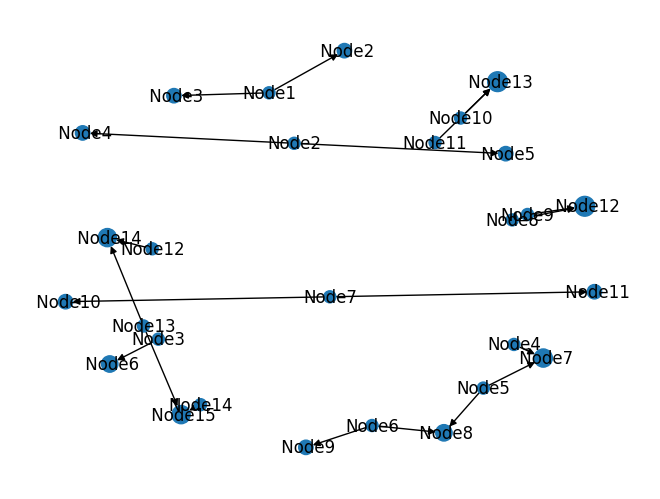

In [7]:
pos = nx.spring_layout(G, seed=767)
nx.draw(G, pos, node_size=[pagerank[node] * 3000 for node in G.nodes], with_labels=True)

plt.savefig("../misc/pageRank")
plt.show()

In [8]:
for node, rank in pagerank.items():
    print(f'{node}: {rank}')

Node1: 0.025062499434515346
 Node2: 0.035714285714285705
 Node3: 0.035714285714285705
Node2: 0.025062499434515346
 Node4: 0.035714285714285705
 Node5: 0.035714285714285705
Node3: 0.025062499434515346
 Node6: 0.04636607199405607
Node4: 0.025062499434515346
 Node7: 0.05701785827382643
Node5: 0.025062499434515346
 Node8: 0.04636607199405607
Node6: 0.025062499434515346
 Node9: 0.035714285714285705
Node7: 0.025062499434515346
 Node10: 0.035714285714285705
 Node11: 0.035714285714285705
Node8: 0.025062499434515346
 Node12: 0.0676696445535968
Node9: 0.025062499434515346
Node10: 0.025062499434515346
 Node13: 0.0676696445535968
Node11: 0.025062499434515346
Node12: 0.025062499434515346
 Node14: 0.05701785827382643
Node13: 0.025062499434515346
 Node15: 0.05701785827382643
Node14: 0.025062499434515346
